In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df_train = pd.read_csv('DATA/mnist_train.csv')
df_train.head(10)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_train.iloc[1]

5        4
0        0
0.1      0
0.2      0
0.3      0
        ..
0.613    0
0.614    0
0.615    0
0.616    0
0.617    0
Name: 1, Length: 785, dtype: int64

In [57]:
first = df_train.iloc[12, 1:].values

In [59]:
image = first.reshape((28, 28))

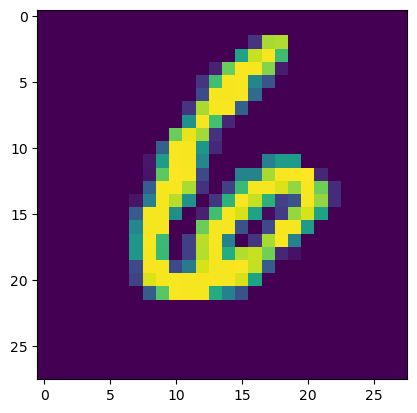

In [61]:
plt.imshow(image)

<Axes: xlabel='5'>

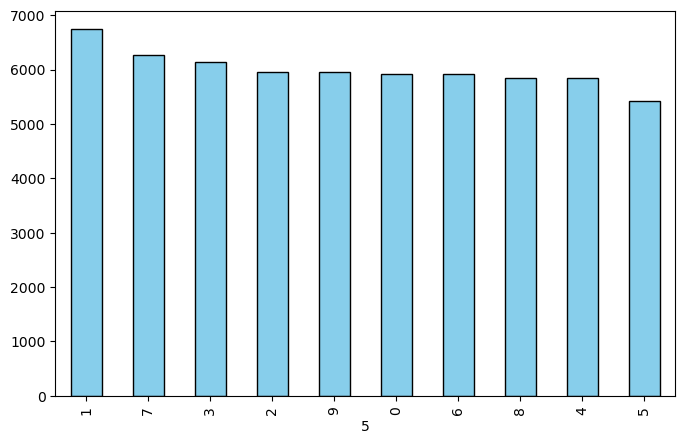

In [49]:
class_counts = df_train['5'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')

In [55]:
df_train[df_train['5']==6]

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
12,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59975,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59980,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59981,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59985,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# I will use Logistic Regression
# Then will use KNN
# Will use PCA on this one

# Steps to follow - 
- Get the data - trian and test
- Scale it with standard scaler
- Train the model
- Test it

In [70]:
df_train.max().max()

255

In [73]:
x_train = df_train.drop('5',axis=1)

In [75]:
y_train = df_train['5']

In [77]:
df_test = pd.read_csv('DATA/mnist_test.csv')

In [79]:
df_test

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
x_test = df_test.drop('5',axis=1)
y_test = df_test['5']

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


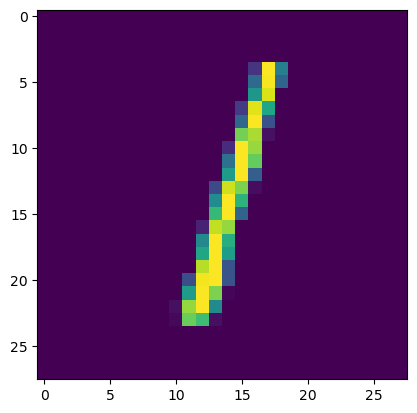

In [111]:
plt.imshow(x_test.iloc[1].to_numpy().reshape(28,28))

In [115]:
df_test.columns = df_train.columns

In [127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(lr, param_grid={'C':[1,2,3,4,5],'penalty':['l1','l2','elasticnet'], 'max_iter':[100,200,300]}, scoring='accuracy', cv=5)

In [129]:
grid.fit(x_train, y_train)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [133]:
grid.best_score_

0.9128986929466345

In [135]:
grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [137]:
logModel = LogisticRegression(C=1, max_iter=100, penalty='l2')
logModel.fit(x_train,y_train)
y_pred = logModel.predict(x_test)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       980
           1       0.98      0.85      0.91      1135
           2       0.97      0.76      0.85      1032
           3       0.87      0.89      0.88      1010
           4       0.90      0.91      0.90       982
           5       1.00      0.26      0.42       892
           6       0.92      0.93      0.93       958
           7       0.97      0.84      0.90      1027
           8       0.50      0.96      0.66       974
           9       0.83      0.92      0.87      1009

    accuracy                           0.84      9999
   macro avg       0.88      0.83      0.83      9999
weighted avg       0.88      0.84      0.83      9999



In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [143]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.99      0.67       980
           1       1.00      0.89      0.94      1135
           2       0.94      0.85      0.89      1032
           3       0.95      0.74      0.83      1010
           4       0.99      0.57      0.72       982
           5       0.98      0.60      0.75       892
           6       0.96      0.88      0.92       958
           7       0.96      0.84      0.90      1027
           8       0.57      0.89      0.69       974
           9       0.85      0.77      0.81      1009

    accuracy                           0.80      9999
   macro avg       0.87      0.80      0.81      9999
weighted avg       0.87      0.80      0.81      9999

